In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

Welcome to JupyROOT 6.26/06


In [3]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [4]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [24]:
mcfile = 'dETdeta_analysis_23727_z=0_no_em_hottowers+fullEmcal_nozs_mc_noweight_0-90_ampt.root'
f1 = ROOT.TFile.Open(mcfile)
h_eT_sim_emcal = TH1F(f1.Get("h_eT_emcal"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_ihcal"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_ohcal"))
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
h_truth = TH1F(f1.Get("hetdeta_ihcalbin"))
h_truth_ohcal = TH1F(f1.Get("hetdeta_ohcalbin"))
h_truth.SetDirectory(0)
h_truth_ohcal.SetDirectory(0)
f1.Close()

In [25]:
h_corr_emcal = TH1F(h_eT_sim_emcal.Clone("h_corr_emcal"))
h_corr_emcal.Divide(h_truth)
h_corr_ihcal = TH1F(h_eT_sim_ihcal.Clone("h_corr_ihcal"))
h_corr_ihcal.Divide(h_truth)
h_corr_ohcal = TH1F(h_eT_sim_ohcal.Clone("h_corr_ohcal"))
h_corr_ohcal.Divide(h_truth_ohcal)
h_corr_calo = TH1F(h_eT_sim_emcal.Clone("h_corr_calo"))
for i in range(1, h_corr_calo.GetNbinsX() + 1):
    h_corr_calo.SetBinContent(i, h_corr_emcal.GetBinContent(i) + h_corr_ihcal.GetBinContent(i) + h_corr_ohcal.GetBinContent(i))
    h_corr_calo.SetBinError(i, np.sqrt(h_corr_emcal.GetBinError(i)**2 + h_corr_ihcal.GetBinError(i)**2 + h_corr_ohcal.GetBinError(i)**2))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


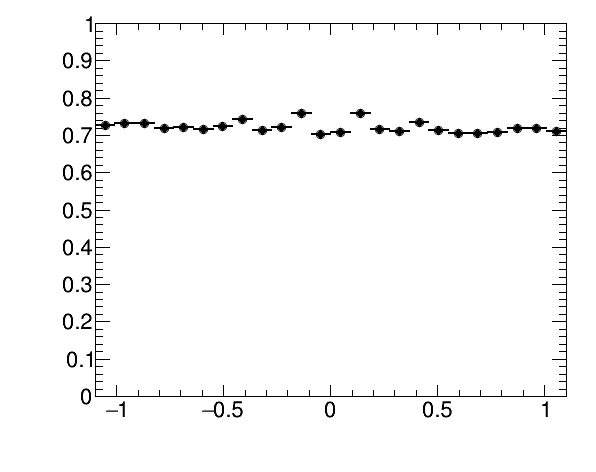

In [13]:
canvas = TCanvas("canvas","",600,500)
h_corr_emcal.GetYaxis().SetRangeUser(0,1)
h_corr_emcal.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


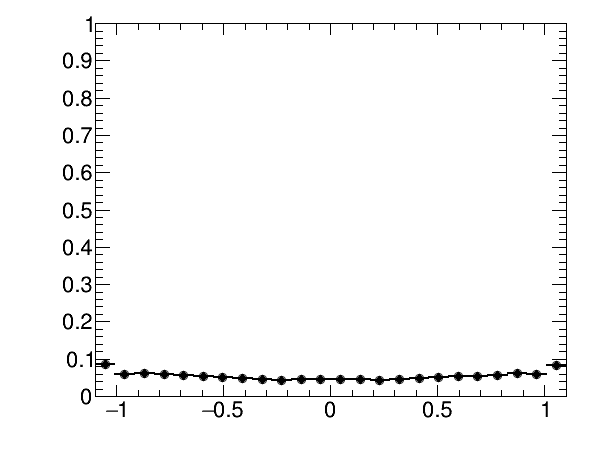

In [14]:
canvas = TCanvas("canvas","",600,500)
h_corr_ihcal.GetYaxis().SetRangeUser(0,1)
h_corr_ihcal.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


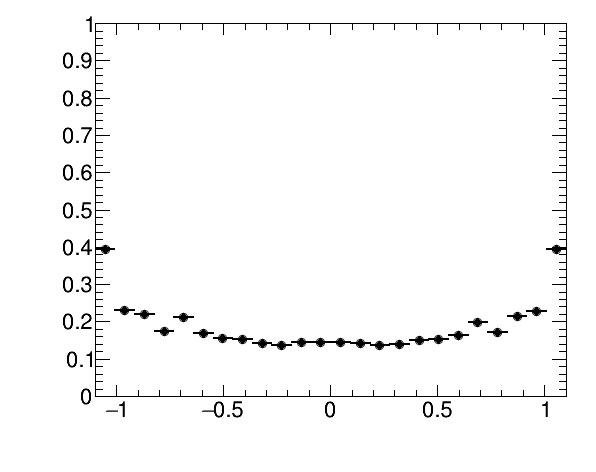

In [15]:
canvas = TCanvas("canvas","",600,500)
h_corr_ohcal.GetYaxis().SetRangeUser(0,1)
h_corr_ohcal.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


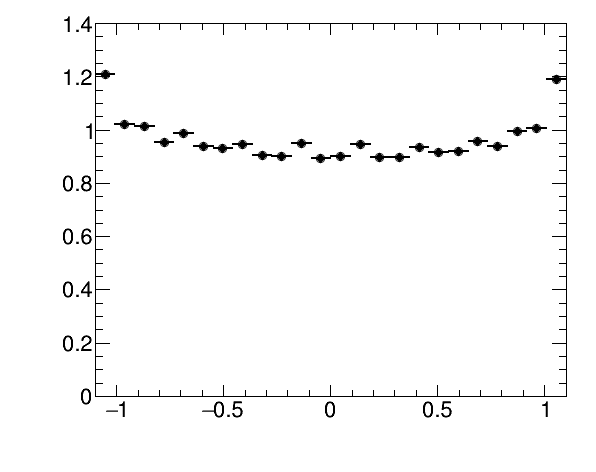

In [26]:
canvas = TCanvas("canvas","",600,500)
h_corr_calo.GetYaxis().SetRangeUser(0,1.4)
h_corr_calo.Draw()
canvas.Draw()